In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear Regression

In [ ]:
df = pd.read_csv('MBA Salary.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [ ]:
df.head(5)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [ ]:
# Adding a constant in equation (y = B(1)x + B(0) + E) E-epsilon (error)

import statsmodels.api as sm
x = sm.add_constant(df['Percentage in Grade 10'])
y = df['Salary']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x.head(3)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00


In [ ]:
y.head(3)

0    270000
1    200000
2    240000
Name: Salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
model = sm.OLS(y_train, x_train).fit()

In [ ]:
model.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

<p>Mba salary = 30587 + 3560 * (percentage in grade 10)</br>
<h4><b><i> Model Diagnostic </i></b></h4>
1. Co-efficient of determination (R-squared) <br>
2. Hypothesis test for regression co-efficient <br>
3. Analysis of variance for overall model validity <br>
4. Residual analysis to validate the regression model assumptions <br>
5. Outlier analysis</p>


## 1. Co-efficient of determination (R-squared)
<p> Higher value of R-square means better fit. Value lies between (0 - 1). Measures the variation in Y</p>

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-09-27 06:43      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

## 2. Hypothesis test for regression co-efficient
<p> Check P > |t| value if value less that significant value (0.05), if less then hypothesis true.</p>

## 3. Residual analysis to validate the regression model 
<p>
1. Residuals are normally distributed.<br>
2. Variance of residual is constant. (Homoscedasticity)<br>
3. Functional form of regression is correctly specified.<br>
4. There is no outliers</p>

In [ ]:
residuals = model.resid

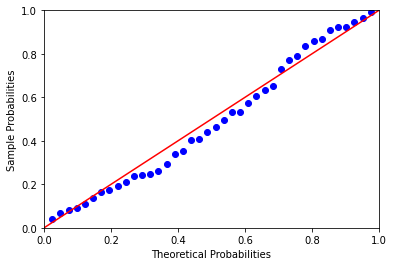

In [ ]:
probplot = sm.ProbPlot(residuals)
probplot.ppplot(line = '45')
plt.show()

variance of error is constant, variance of dependent variable is same for all data points (Homoscedasity)

In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

Text(0, 0.5, 'Standardized Residuals')

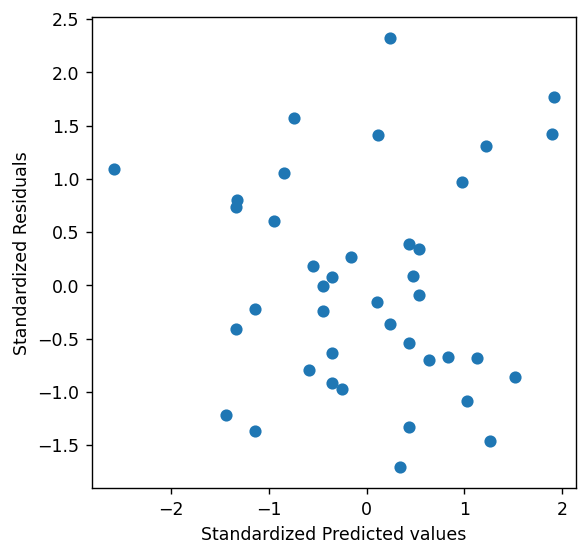

In [ ]:
x = get_standardized_values(model.fittedvalues)
y = get_standardized_values(model.resid)

plt.figure(figsize = (5, 5), dpi = 125)
plt.scatter(x, y)
plt.xlabel('Standardized Predicted values')
plt.ylabel('Standardized Residuals')

### Outlier Analysis
1. Z-Score - any observation with score > 3 or < -3 can be outlier
2. Mahalanalobis Distance
3. Cook's Distance
4. Leverage Value

In [ ]:
from scipy.stats import zscore

In [ ]:
df['z-score_salary'] = zscore(df['Salary']) 

In [ ]:
df[(df['z-score_salary'] > 3) | (df['z-score_salary'] < -3)]

,S. No.,Percentage in Grade 10,Salary,z-score_salary


### Predicting for test data

Measures MSE, RMSE, MASE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
np.abs(r2_score(y_test, y_pred))   #15.6% variance in validation set

0.156645849742304

In [ ]:
mean_squared_error(y_test, y_pred)

5396084152.419214

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

73458.04348346895

## Exam Portion DA
1. Fundamentals of DA
2. Pandas, Numpy, Plotting, (Some web scrappping beautiful soap)
3. Probability and Statistics
(Unit 5 Only Text analysis video)
4. Linear Regression
4. Logistic Regression and its analysis
5. Decision Tree and Cluster Analysis